<a href="https://colab.research.google.com/github/anjusree123/TensorFlow/blob/main/K_fold_cross_validation_for_Skikit_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import sys
import tensorflow as tf
import keras
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns

In [123]:
df=pd.read_csv('/content/data 3.csv')

In [124]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [125]:
print(df.describe().T)
print(df.isnull().sum())
df.dropna()

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [126]:
df=df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [127]:
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

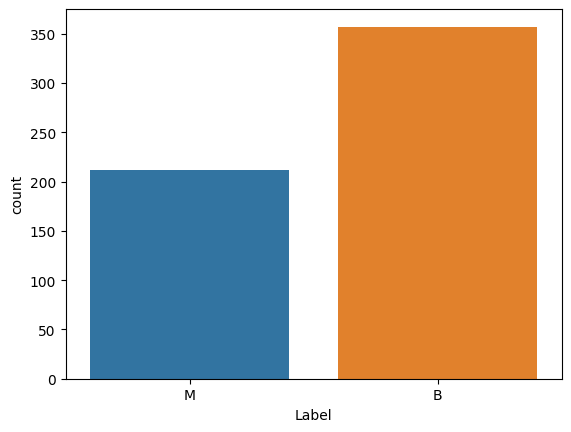

In [128]:
sns.countplot(x="Label", data=df)

In [129]:
y=df['Label'].values

In [135]:
x=df.drop(labels=["Label","id"],axis=1)

KFold cross validation

In [167]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold

In [168]:
folds=KFold(n_splits=7,random_state=42,shuffle=True)
xarr=x.to_numpy()

In [169]:
from sklearn.ensemble import HistGradientBoostingClassifier
newmodel=HistGradientBoostingClassifier().fit(x_train, y_train)

In [170]:
scalr=MinMaxScaler()
scalr.fit(xarr)
xarr=scalr.transform(xarr)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
scores=cross_val_score(newmodel,xarr,y,scoring='accuracy',cv=folds,n_jobs=2)
for score in scores:
  print (score)

0.9390243902439024
0.975609756097561
0.9753086419753086
0.9382716049382716
1.0
0.9506172839506173
0.9629629629629629


In [140]:
datasplit=folds.split(xarr,y)

In [150]:
from sklearn.ensemble import HistGradientBoostingClassifier
prediced_y=[]
expected_y=[]

In [161]:

scalr=MinMaxScaler()
for train_index,test_index in datasplit:
  x_train,x_test=xarr[train_index],xarr[test_index]
  y_train,y_test=y[train_index],y[test_index]
  scalr.fit(x_train)
  x_train=scalr.transform(x_train)
  x_test=scalr.transform(x_test)
  newmodel=HistGradientBoostingClassifier().fit(x_train, y_train)
  newprediction=newmodel.predict(x_test)
  accuracy1=metrics.accuracy_score(y_test,newprediction)
  print(accuracy1)
  prediced_y.extend(newprediction)
  expected_y.extend(y_test)

Normal Method

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [108]:
x_train = x_train.astype(float)

In [109]:
np.isnan(x_train)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
402,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
270,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [111]:
from sklearn.preprocessing import StandardScaler
saclr=StandardScaler()
saclr.fit(x_train)
x_train=saclr.transform(x_train)
x_test=saclr.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
from sklearn.impute import SimpleImputer


In [113]:
from sklearn import metrics,svm
from sklearn.ensemble import HistGradientBoostingClassifier
model=HistGradientBoostingClassifier().fit(x_train, y_train)
prediction=model.predict(x_test)
accuracy=metrics.accuracy_score(y_test,prediction)
print(accuracy)

0.951048951048951
